# Assignment 4 Squirrent Sprint

In [1]:
# imports
# Run this cell to ensure that altair plots show up on gradescope
# We will talk more about what these lines do later in the course
import altair as alt

# Handle large data sets without embedding them in the notebook
#alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')

# pandas
import pandas as pd

In [2]:
# load data
data_path = "../data/squirrel-data.csv"
data = pd.read_csv(data_path, encoding="utf-8", encoding_errors="replace")
data.columns = data.columns.str.replace(" ", "_")

In [3]:
data.head(1)

,Area_Name,Area_ID,Park_Name,Park_ID,Squirrel_ID,Primary_Fur_Color,Highlights_in_Fur_Color,Color_Notes,Location,Above_Ground_(Height_in_Feet),Specific_Location,Activities,Interactions_with_Humans,Other_Notes_or_Observations,Squirrel_Latitude_(DD.DDDDDD),Squirrel_Longitude_(-DD.DDDDDD)
0,UPPER MANHATTAN,A,Fort Tryon Park,1,A-01-01,Gray,White,NaN,Ground Plane,NaN,NaN,Foraging,Indifferent,NaN,40.85941,-73.933936


## Task 3: Compare Squirrel Activities Across Parks (Pie Chart) 

In [41]:
# Too many unique activities maybe group them?
act_vc = data["Activities"].value_counts().to_frame(name="Count").rename_axis("Activity").reset_index()

In [93]:
# separate processed csv
task_3_data = pd.read_csv("data2.csv")

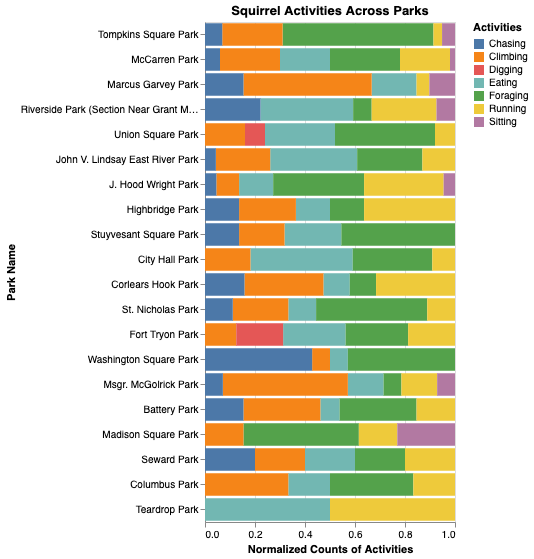

In [100]:
# Amy's 
alt.Chart(task_3_data).mark_bar().encode(
    y=alt.Y("Park_Name", sort = "-x", title = "Park Name"),
    x=alt.X("count()",stack = "normalize", title = "Normalized Counts of Activities"),
    color=alt.Color("Activities", title = "Activities"),
    tooltip = ["Park_Name", "Area_Name", "count()"],
).properties(
      width = 250,
      height = 500,
      title = "Squirrel Activities Across Parks"
)

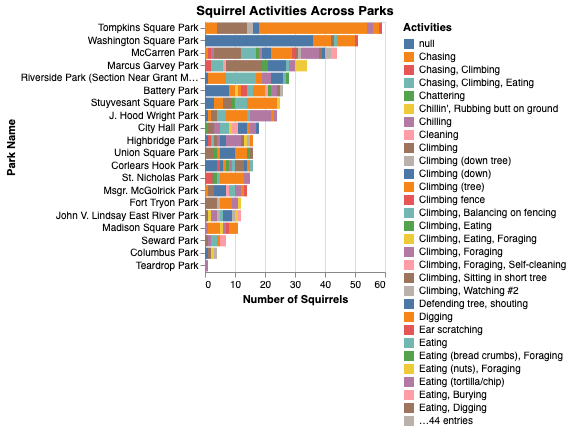

In [5]:
# # Tony's facet stack bar chart
# task3_tony = alt.Chart(data).mark_bar().encode(
#     y=alt.Y("Park_Name", sort = "-x", title = "Park Name"),
#     x=alt.X("count()", title = "Number of Squirrels"),
#     color=alt.Color("Activities", title = "Activities"),
#     tooltip = ["Park_Name", "Area_Name", "count()"],
# ).properties(
#       width = 180,
#       height = 250,
#       title = "Squirrel Activities Across Parks"
# )
# # ).facet(
# #     facet="Area_Name"
# # )
# task3_tony

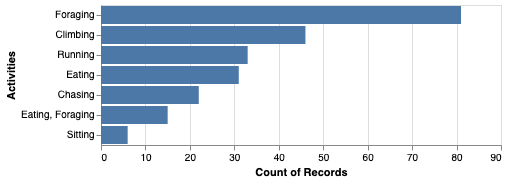

In [91]:
# grey squirrels
grey_squirrels = data.query("Primary_Fur_Color == 'Gray' ")

# keep 3 most common activities only

# act_vc = data["Activities"].value_counts().to_frame(name="Count").rename_axis("Activity").reset_index()
most_common_act = act_vc["Activity"].loc[:6].tolist()
grey_squirrels = grey_squirrels[grey_squirrels["Activities"].isin(most_common_act)]

# creates emoji and add it to the df
out = []
for a in grey_squirrels[["Activities"]].values:
    if a == "Foraging":
        e = "🌿"
    elif a == "Climbing":
        e = "🐿️"
    else:
        e = "💨"
    out.append(e)
grey_squirrels["emoji"] = out
# graphs 3 most
alt.Chart(grey_squirrels).mark_bar().encode(
    y = alt.Y("Activities", sort = "-x"),
    x = "count(Actitivities):Q"
)

## Task 4: Summarize the squirrel colour distribution in New York City

We believe the first sketch listed is the best option that achieves the task mentioned above. Given we are trying to visualize two nominal attributes, hence using a bar chart would a first option to consider. Morever, bar charts can be stacked to represent variety of levels/groups within one of the nominal attribute. And, we could normalized these stacks to see what proportion it represents among all groups. Thus, we belive this normalized stacked bar chart using appropriate attributes is the best sketch among all to summarize squirrel colour distribution in New York City. If we were to say why option 2 nor option 3 were not a good approach, both options used wrong attributes to represent the data, hence might not provide as effective visualization than option 1. Option 2, wrong uses `squirrel color` as the groups, and diffrentiate within these colors using `park names`, thiw would make the bars look awful since there are many distinct park names. Similarly, option 3 has the correct sub-grouping by colors, but uses `park names` in its x-axis as the main groups (too detailed) instead of 
`area names` (broader view of New York City).